In [1]:
import pandas as pd, numpy as np, scipy as sp, seaborn as sb

In [2]:
import statsmodels.api as sm

In [3]:
data = pd.read_excel('animals-weight.xlsx')

In [17]:
data

,Animals,Body Weight,Brain Weight
0,Mountain beaver,1.350,8.10
1,Cow,465000.000,423.00
2,Grey wolf,36330.000,119.50
3,Goat,27660.000,115.00
4,Roe deer,14830.000,98.20
5,Guinea pig,1040.000,5.50
6,Verbet,4190.000,58.00
7,Chinchilla,0.425,6.40
8,Ground squirrel,0.101,4.00
9,Artic ground squirrel,0.920,5.70


In [5]:
data.describe()

,Body Weight,Brain Weight
count,6.000000e+01,60.000000
mean,2.052378e+05,291.572000
std,9.135543e+05,944.724042
min,5.000000e-03,0.140000
25%,7.000000e-01,3.975000
50%,3.400000e+03,17.250000
75%,5.299500e+04,170.500000
max,6.654000e+06,5712.000000


In [7]:
pd.__version__

'0.24.2'

In [31]:
data.shape[0]

60

Text(0.5, 1.0, 'Plot peso membros animal')

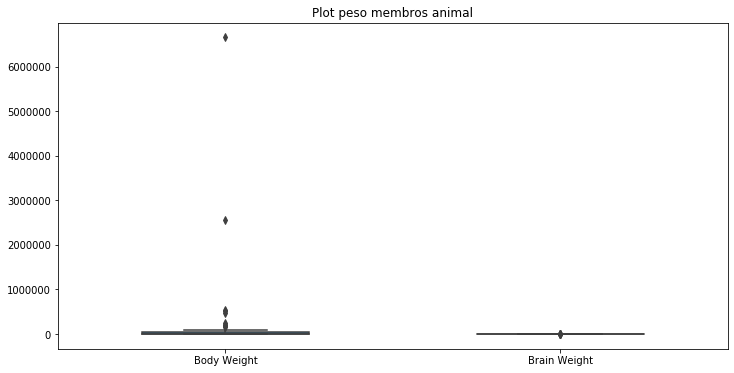

In [32]:
ax = sb.boxplot(data = data, width=0.5)
ax.figure.set_size_inches(12,6)
ax.set_title('Plot peso membros animal')

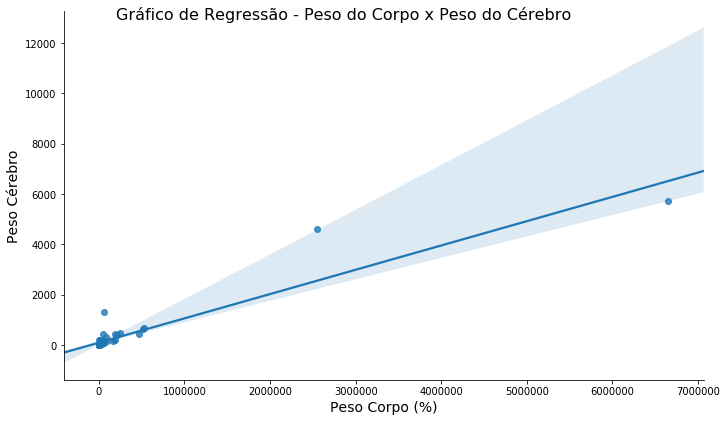

In [33]:
ax = sb.lmplot(x='Body Weight', y = 'Brain Weight', data = data)
ax.fig.set_size_inches(12,6)
ax.fig.suptitle('Gráfico de Regressão - Peso do Corpo x Peso do Cérebro', fontsize = 16)
ax.set_xlabels('Peso Corpo (%)', fontsize = 14)
ax.set_ylabels('Peso Cérebro', fontsize = 14)
ax

In [34]:
data.corr()

,Body Weight,Brain Weight
Body Weight,1.00000,0.93409
Brain Weight,0.93409,1.00000


In [66]:
data.rename(columns={'Body Weight':'Body_Weight', 'Brain Weight':'Brain_Weight'},inplace=True)

In [67]:
X= data['Body_Weight']
Y=sm.add_constant(data['Brain_Weight'])

C:\Users\ebezerra\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [110]:
Y.head()

,const,Brain_Weight
0,1.0,8.1
2,1.0,119.5
3,1.0,115.0
4,1.0,98.2
5,1.0,5.5


In [111]:
X.head()

0        1.35
2    36330.00
3    27660.00
4    14830.00
5     1040.00
Name: Body_Weight, dtype: float64

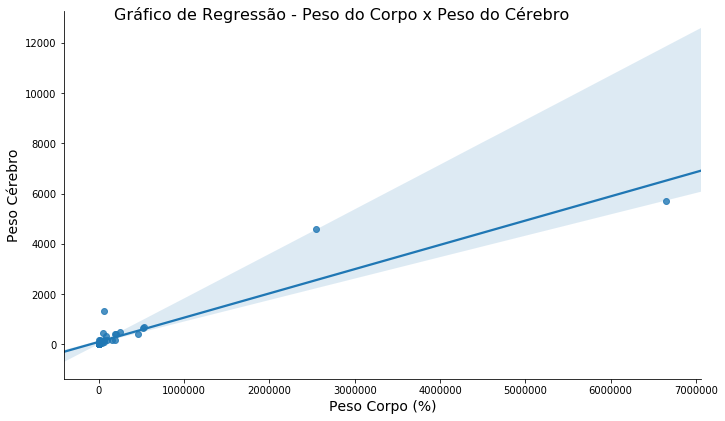

In [80]:
ax = sb.lmplot(x='Body_Weight', y = 'Brain_Weight', data = data)
ax.fig.set_size_inches(12,6)
ax.fig.suptitle('Gráfico de Regressão - Peso do Corpo x Peso do Cérebro', fontsize = 16)
ax.set_xlabels('Peso Corpo (%)', fontsize = 14)
ax.set_ylabels('Peso Cérebro', fontsize = 14)
ax

In [50]:
X.shape, Y.shape

((60,), (60, 2))

In [115]:
amostra = data.query('Body_Weight < 6000')

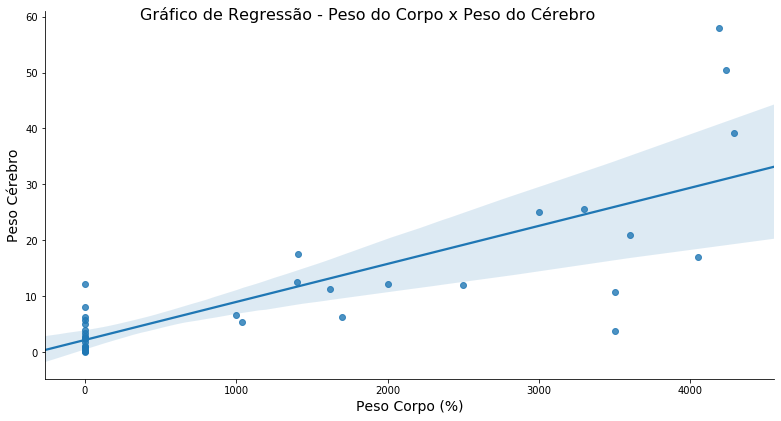

In [116]:
ax = sb.lmplot(x='Body_Weight', y = 'Brain_Weight', data = amostra)
ax.fig.set_size_inches(12,6)
ax.fig.suptitle('Gráfico de Regressão - Peso do Corpo x Peso do Cérebro', fontsize = 16)
ax.set_xlabels('Peso Corpo (%)', fontsize = 14)
ax.set_ylabels('Peso Cérebro', fontsize = 14)
ax

In [89]:
X= amostra.Body_Weight
Y=sm.add_constant(amostra.Brain_Weight)

In [105]:

resultado = sm.OLS(X,Y).fit()

In [106]:
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:            Body_Weight   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     14.36
Date:                Sat, 26 Oct 2019   Prob (F-statistic):           0.000400
Time:                        14:27:36   Log-Likelihood:                -636.49
No. Observations:                  53   AIC:                             1277.
Df Residuals:                      51   BIC:                             1281.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.245e+04   6060.036      2.054   

In [107]:
len(resultado.predict())

53

In [108]:
data.shape


(60, 3)

In [113]:
amostra['Previsao'] = resultado.predict()

C:\Users\ebezerra\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [114]:
amostra

,Animals,Body_Weight,Brain_Weight,Previsao
0,Mountain beaver,1.350,8.10,13310.613113
2,Grey wolf,36330.000,119.50,25163.323661
3,Goat,27660.000,115.00,24684.533738
4,Roe deer,14830.000,98.20,22897.051357
5,Guinea pig,1040.000,5.50,13033.978935
6,Verbet,4190.000,58.00,18619.861375
7,Chinchilla,0.425,6.40,13129.736920
8,Ground squirrel,0.101,4.00,12874.382294
9,Artic ground squirrel,0.920,5.70,13055.258487
10,African giant pouched rat,1000.000,6.60,13151.016472
